## Problem Statement

**In this problem we have be simulated as an independent consultant**

   Your client is a large MNC and they have 9 broad verticals across the organisation. One of the problem your client is facing is around identifying the right people for promotion (only for manager position and below) and prepare them in time. Currently the process, they are following is:

   * They first identify a set of employees based on recommendations/ past performance
   * Selected employees go through the separate training and evaluation program for each vertical. These programs are based on the required skill of each vertical
   * At the end of the program, based on various factors such as training performance, KPI completion (only employees with KPIs completed greater than 60% are considered) etc., employee gets promotion

   For above mentioned process, the final promotions are only announced after the evaluation and this leads to delay in transition to their new roles. Hence, company needs your help in identifying the eligible candidates at a particular checkpoint so that they can expedite the entire promotion cycle. 
    
![](hr.png)

   They have provided multiple attributes around Employee's past and current performance along with demographics. Now, The task is to predict whether a potential promotee at checkpoint in the test set will be promoted or not after the evaluation process.

## Data Description

![](hr_data_description.png)

## Project Steps:
  
   0. Setting up the main libraries and importing the dataset 
   1. Choosing the Sample Dataset
   2. Data Wrangling / Data Preprocessing
        - 2.1. Data Wrangling / Data Preprocessing
        - 2.2. Cardinality
        - 2.3. Missing Data Imputation
   3. Visual Exploratory Data Analysis
   4. Model Development
   5. Model EvaLuation
   

## 0. Setting up the main libraries and importing the dataset

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
pd.set_option('display.max_columns', None)

In [3]:
hr_data = pd.read_csv('C:\\Users\\R558\\Downloads\\Hackathons\\Analytics Vidya Hackathon\\HR Analytics\\train_data.csv')
hr_data.head()

,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted
0,65438,Sales & Marketing,region_7,Master's & above,f,sourcing,1,35,5.0,8,1,0,49,0
1,65141,Operations,region_22,Bachelor's,m,other,1,30,5.0,4,0,0,60,0
2,7513,Sales & Marketing,region_19,Bachelor's,m,sourcing,1,34,3.0,7,0,0,50,0
3,2542,Sales & Marketing,region_23,Bachelor's,m,other,2,39,1.0,10,0,0,50,0
4,48945,Technology,region_26,Bachelor's,m,other,1,45,3.0,2,0,0,73,0


In [4]:
hr_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54808 entries, 0 to 54807
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   employee_id           54808 non-null  int64  
 1   department            54808 non-null  object 
 2   region                54808 non-null  object 
 3   education             52399 non-null  object 
 4   gender                54808 non-null  object 
 5   recruitment_channel   54808 non-null  object 
 6   no_of_trainings       54808 non-null  int64  
 7   age                   54808 non-null  int64  
 8   previous_year_rating  50684 non-null  float64
 9   length_of_service     54808 non-null  int64  
 10  KPIs_met >80%         54808 non-null  int64  
 11  awards_won?           54808 non-null  int64  
 12  avg_training_score    54808 non-null  int64  
 13  is_promoted           54808 non-null  int64  
dtypes: float64(1), int64(8), object(5)
memory usage: 4.8+ MB


## 1. Choosing Sample Dataset

*We can see that we have a huge dataset with 54808 entries!*

In [5]:
len(hr_data)

54808

    Since we have a huge dataset and limited processing capacity we will choose a smaller random fraction (sample) for our analysis purpose.
    
    Note:
    Large data set will further slow our processing time.

In [6]:
df = hr_data.sample(frac=0.10)
len(df)

5481

    We selected 10% of the total dataset. Now we comparatively have a smaller dataset for our analysis i.e. we have randomly selected 5481 rows for our analysis.
    
    We can clearly see below that we randomly selected 10% chunk of our data from rows 49045 to 50134 and memory usage is reduced to 535.3+ KB
    

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5481 entries, 43878 to 15379
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   employee_id           5481 non-null   int64  
 1   department            5481 non-null   object 
 2   region                5481 non-null   object 
 3   education             5221 non-null   object 
 4   gender                5481 non-null   object 
 5   recruitment_channel   5481 non-null   object 
 6   no_of_trainings       5481 non-null   int64  
 7   age                   5481 non-null   int64  
 8   previous_year_rating  5080 non-null   float64
 9   length_of_service     5481 non-null   int64  
 10  KPIs_met >80%         5481 non-null   int64  
 11  awards_won?           5481 non-null   int64  
 12  avg_training_score    5481 non-null   int64  
 13  is_promoted           5481 non-null   int64  
dtypes: float64(1), int64(8), object(5)
memory usage: 535.3+ KB


## 2. Data Wrangling / Data Preprocessing

### 2.1. Data Formatting

   In the `gender` column the categories are labelled `m` for male and `f` for female
   
   We will replace them with full `Male` and `Female` labels for better visualization purposes in next section

In [8]:
df.gender = df.gender.replace(['f', 'm'], ['Female', 'Male'])

In [9]:
df.gender.head()

43878      Male
40163    Female
54239    Female
53984      Male
35401      Male
Name: gender, dtype: object

   We can see that the original labels have been successfully replaced with appropriate Male and Female labels

### 2.1. Cardinality

The number of different `labels` (categories) within a categorical variable is known as `cardinality`

A `high` number of labels within a variable is known as `high cardinality`.

High cardinality may pose the following problems:

   - Variables with too many labels tend to dominate over those with only a few labels, particularly in `Tree based algorithms`
   - A big number of labels within a variable may introduce noise with little, if any, information, therefore making machine learning models prone to `over-fit`
   - Some of the labels may only be present in the training data set, but not in the test set, therefore machine learning algorithms may over-fit to the training set.
   - Contrarily, some labels may appear only in the test set, therefore leaving the machine learning algorithms unable to perform a calculation over the new (unseen) observation.

In particular, `tree based methods` can be biased towards variables with lots of labels (variables with high cardinality). Thus, their performance may be affected by high cardinality.

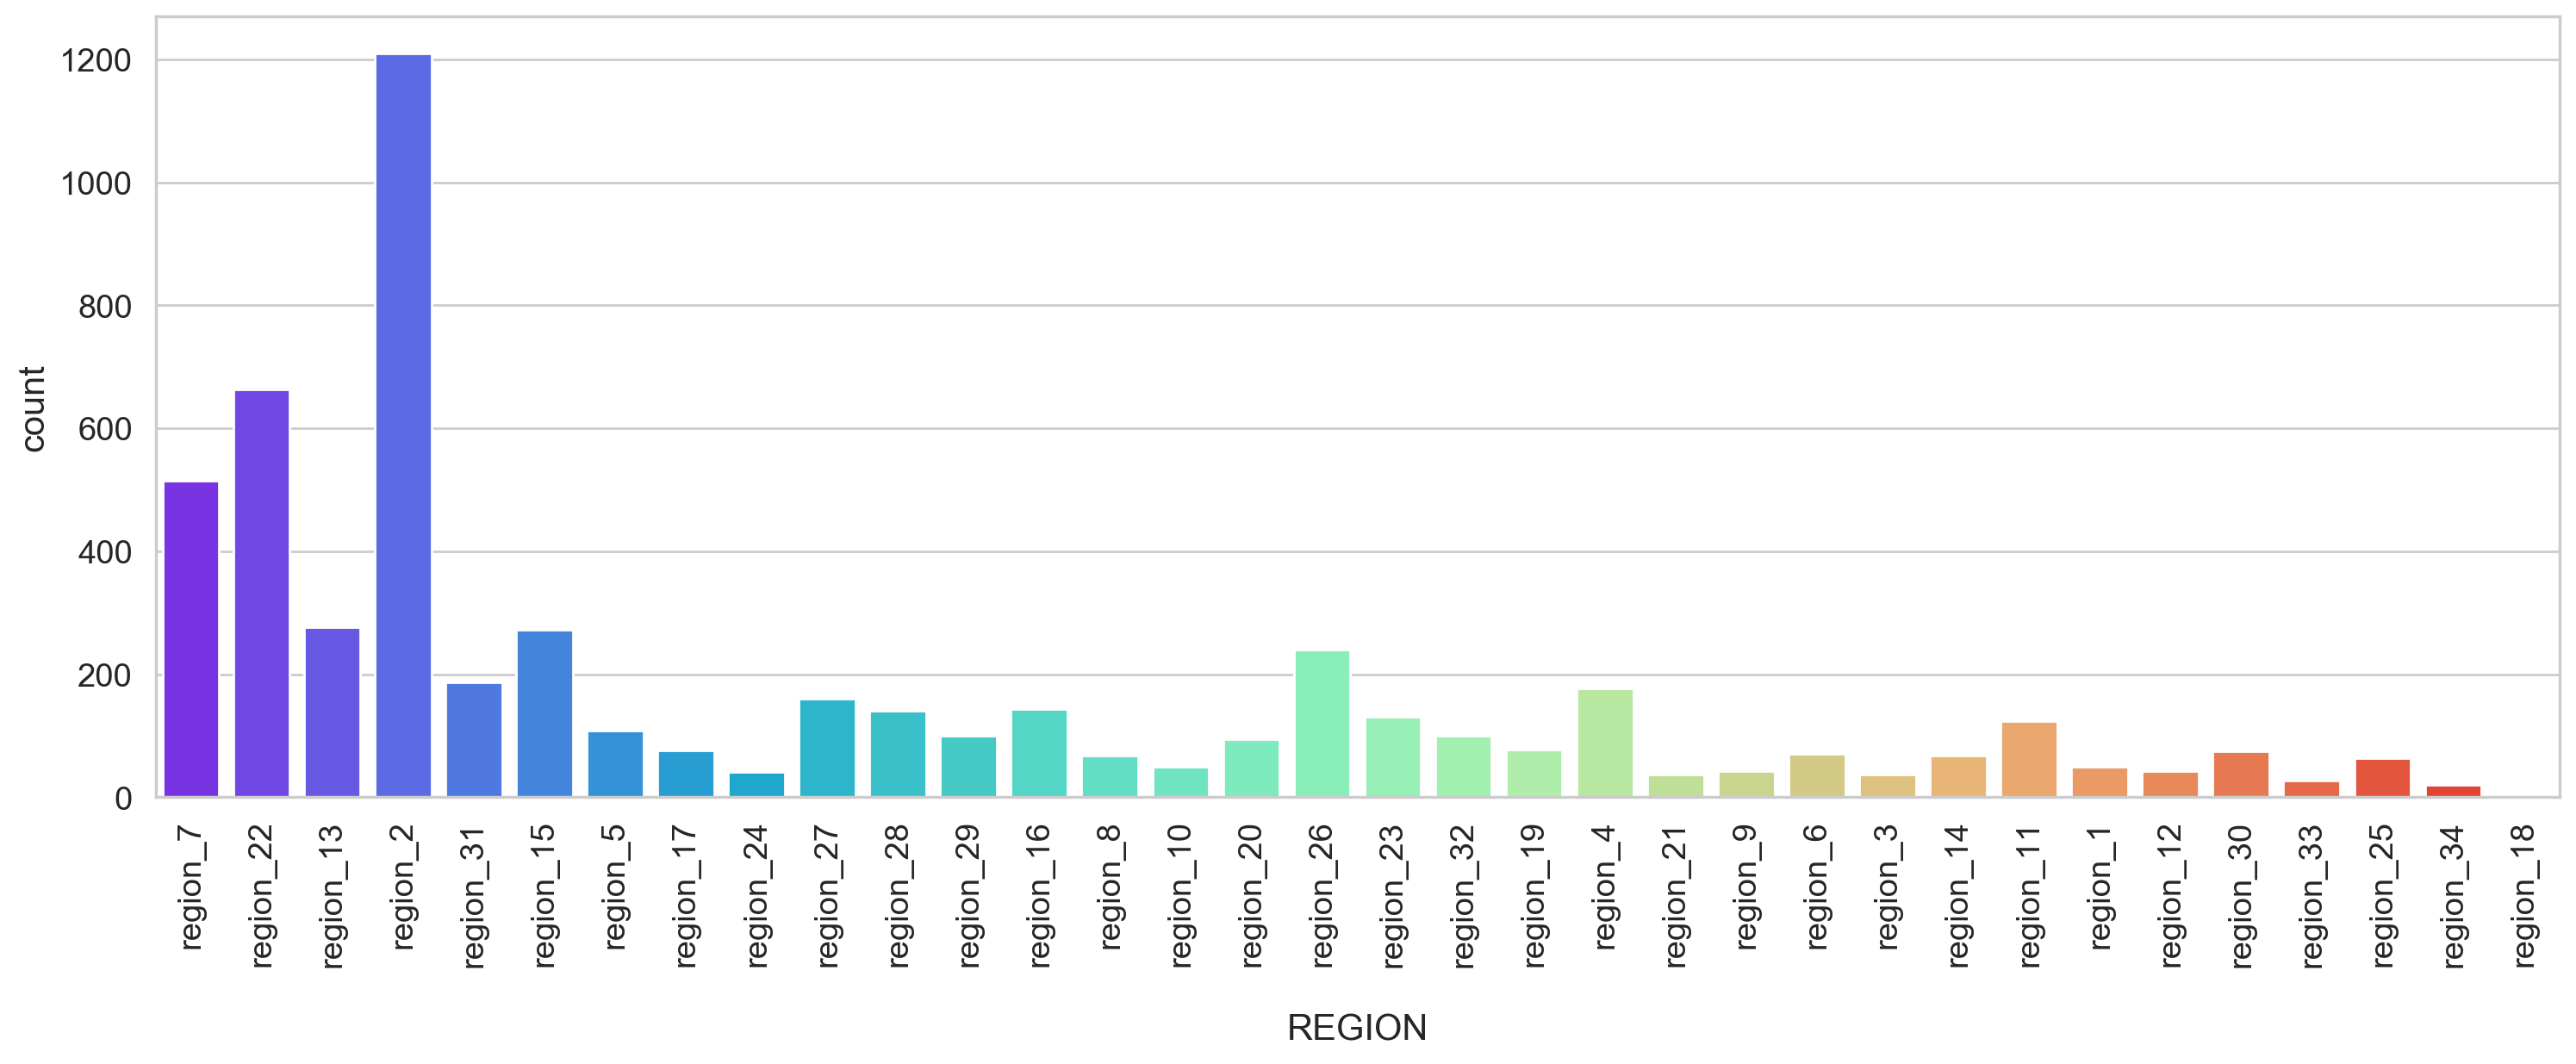

In [10]:
plt.figure(figsize=(18,6), dpi=200)
sns.set(style='whitegrid', font_scale=1.25)
sns.countplot('region', data=df, palette='rainbow')
plt.xlabel('\nREGION')
plt.xticks(rotation=90);

* Here we clearly see that variable `region` has high number of categories i.e. it has a very high cardinality.
   
* One more observation is that the `region` variable measurement is ordinal i.e. the labels in the varibale has an order.. (region_1, region_2, region_3, etc.)

* Since we are going to use tree based algorithm as one of our models we would want to quantify the high cardinality issue for better model accuracy

Now we see that we have 34 unique entries in `region` column. 
We will attempt to reduce these categories to avoid further problems with our model accuracy

In [11]:
df.region.nunique()

34

In [12]:
df.region.values

array(['region_7', 'region_7', 'region_22', ..., 'region_17', 'region_23',
       'region_30'], dtype=object)

In [13]:
region_sorted = df.region.unique().tolist()
region_sorted.sort()

We can see the unique values below

In [14]:
region_sorted

['region_1',
 'region_10',
 'region_11',
 'region_12',
 'region_13',
 'region_14',
 'region_15',
 'region_16',
 'region_17',
 'region_18',
 'region_19',
 'region_2',
 'region_20',
 'region_21',
 'region_22',
 'region_23',
 'region_24',
 'region_25',
 'region_26',
 'region_27',
 'region_28',
 'region_29',
 'region_3',
 'region_30',
 'region_31',
 'region_32',
 'region_33',
 'region_34',
 'region_4',
 'region_5',
 'region_6',
 'region_7',
 'region_8',
 'region_9']

* In the above list we see a pattern. `region_1` is follwed by `region_10 to region_19` and it displays a pattern of regions `after` region_1 as `sub-regions` and region_1 as `head-region`. 
* Similar pattern is observed after `region_2` and `region_3`.

* Hence, we will try to `group` the sub-regions in one and attempt to reduced the cardinality

In [15]:
df.region = df.region.replace(['region_1', 'region_10', 'region_11', 
                   'region_12', 'region_13', 'region_14', 
                   'region_15', 'region_16', 'region_17', 
                   'region_18', 'region_19'], 
                  ['region_1', 'region_1', 'region_1', 
                   'region_1', 'region_1', 'region_1', 
                   'region_1', 'region_1', 'region_1', 
                   'region_1', 'region_1'])

In [16]:
df.region = df.region.replace(['region_2', 'region_20', 'region_21', 
                   'region_22', 'region_23', 'region_24', 
                   'region_25', 'region_26', 'region_27', 
                   'region_28', 'region_29'], 
                  ['region_2','region_2','region_2',
                   'region_2','region_2','region_2',
                   'region_2','region_2','region_2', 
                   'region_2','region_2'])

In [17]:
df.region = df.region.replace(['region_3', 'region_30', 
                               'region_31', 'region_32', 
                               'region_33', 'region_34'], 
                              ['region_3','region_3',
                               'region_3','region_3',
                               'region_3','region_3'])

Here we have successfully grouped the sub-regions into their respective head-regions and `reduced` the cardinality to `9` from the original `34`

*Note: This may alter the memory usage of the dataset*

In [18]:
df.region.nunique()

9

We can also see the difference visually

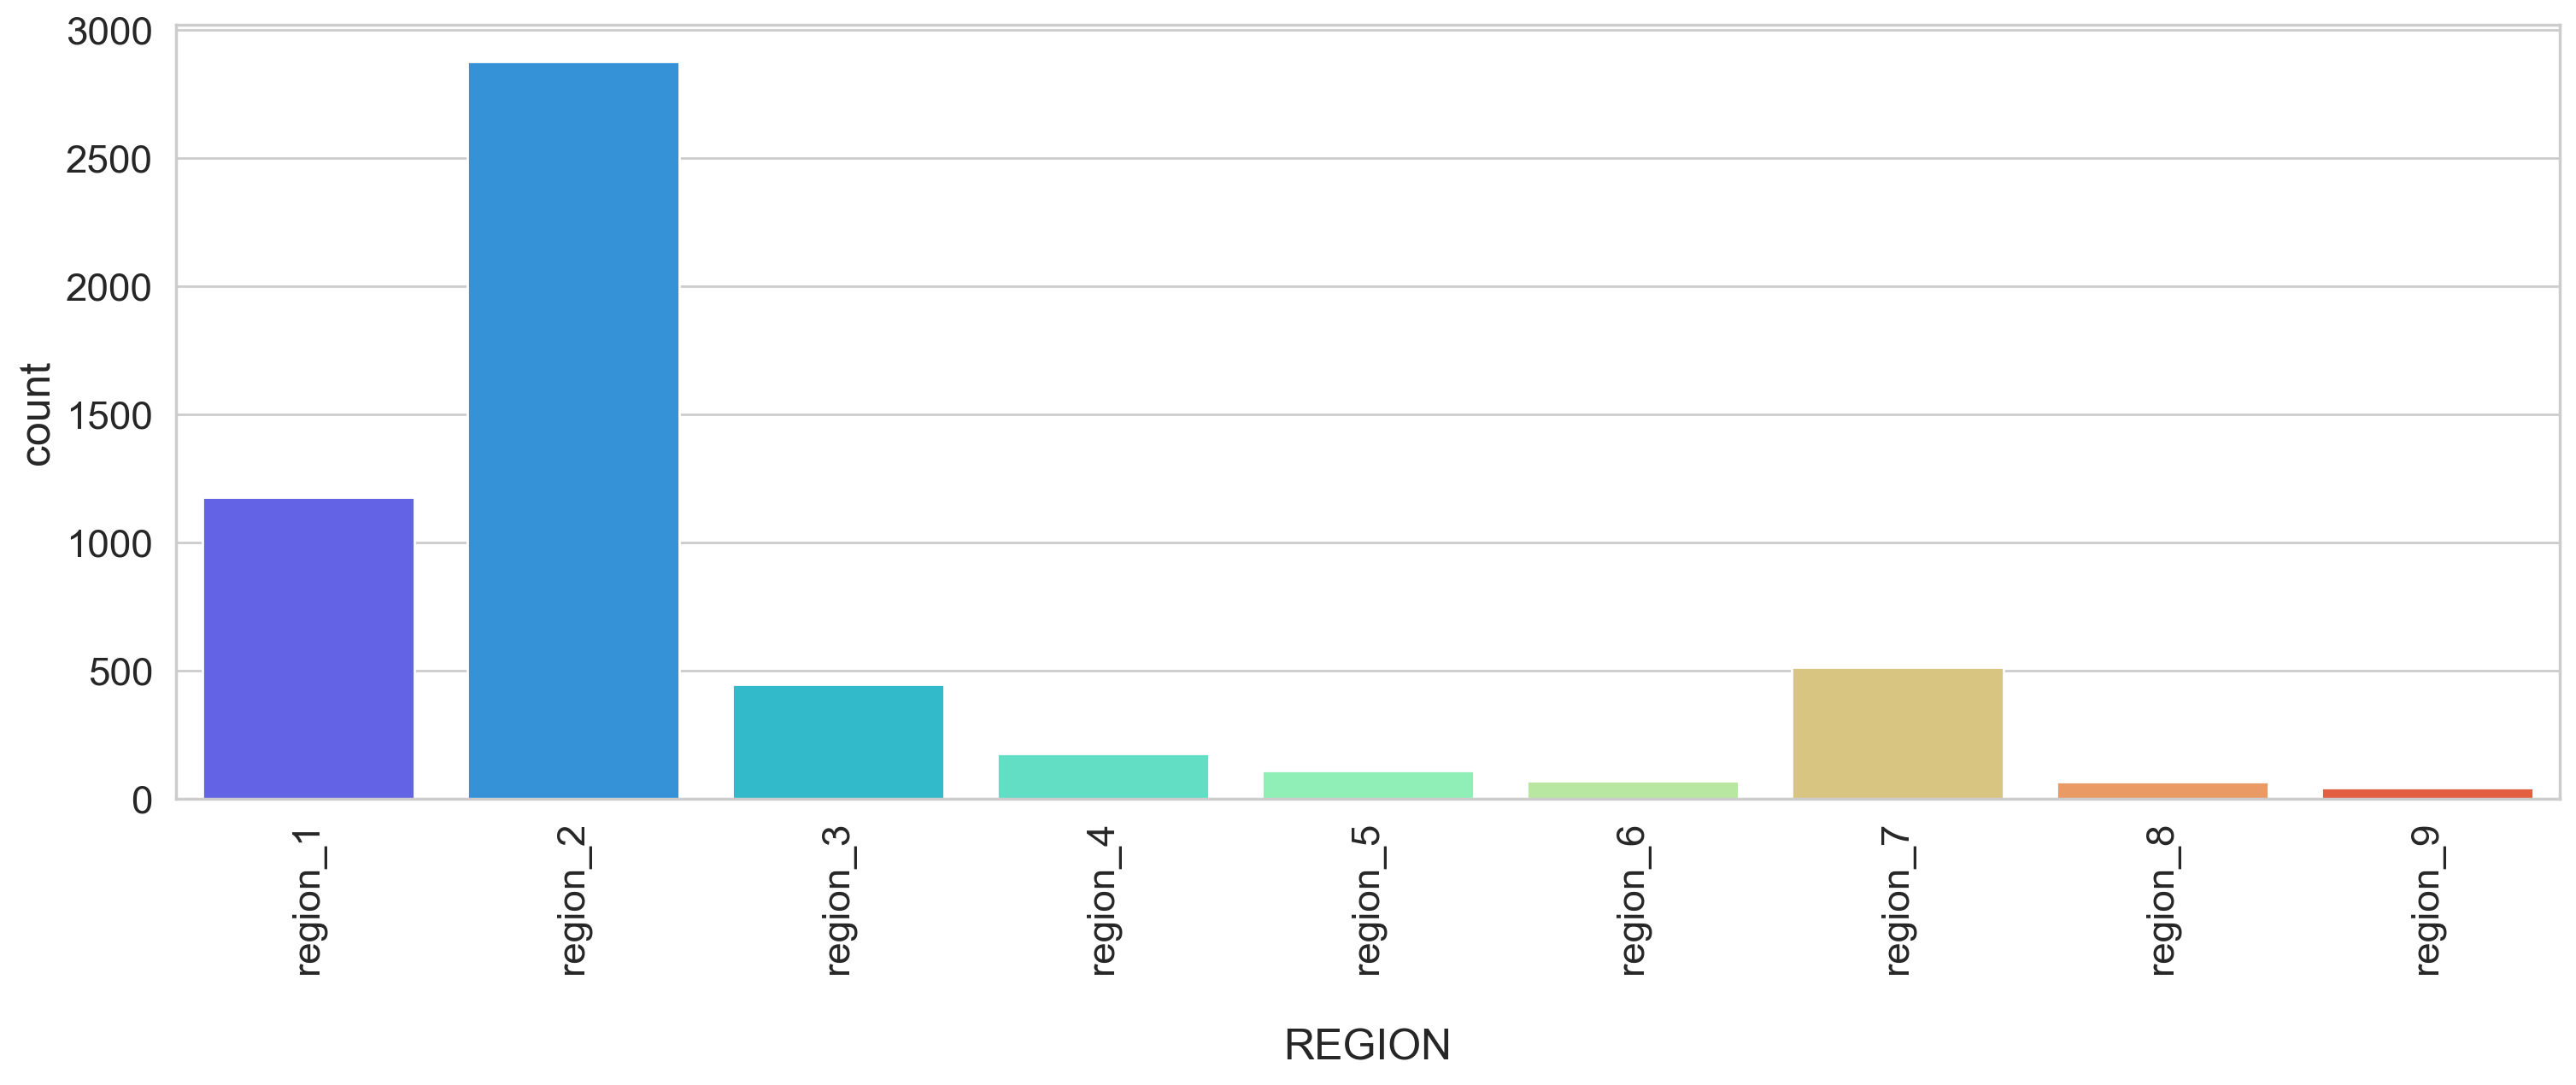

In [19]:
plt.figure(figsize=(18,6), dpi=200)
sns.set(style='whitegrid', font_scale=1.5)
sns.countplot('region', data=df, palette='rainbow', 
              order=['region_1', 'region_2', 'region_3', 
                     'region_4', 'region_5', 'region_6', 
                     'region_7', 'region_8', 'region_9'])
plt.xlabel('\nREGION')
plt.xticks(rotation=90);

## 2.3. Missing Data Imputation

In this section we will impute missing data i.e. will replace the missing data (`Nan`) with some value

For this purpose we will use two general techniques:

* We will replace the `numerical` data with the `mean` and
* We will replace the `categorical` data with the `mode`

In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5481 entries, 43878 to 15379
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   employee_id           5481 non-null   int64  
 1   department            5481 non-null   object 
 2   region                5481 non-null   object 
 3   education             5221 non-null   object 
 4   gender                5481 non-null   object 
 5   recruitment_channel   5481 non-null   object 
 6   no_of_trainings       5481 non-null   int64  
 7   age                   5481 non-null   int64  
 8   previous_year_rating  5080 non-null   float64
 9   length_of_service     5481 non-null   int64  
 10  KPIs_met >80%         5481 non-null   int64  
 11  awards_won?           5481 non-null   int64  
 12  avg_training_score    5481 non-null   int64  
 13  is_promoted           5481 non-null   int64  
dtypes: float64(1), int64(8), object(5)
memory usage: 663.3+ KB


   We can clearly see that variables/columns `education` and `previous_year_rating` have some missing data
    
    Lets see the percentage of the missing data

In [21]:
df.isnull().mean()*100

employee_id             0.000000
department              0.000000
region                  0.000000
education               4.743660
gender                  0.000000
recruitment_channel     0.000000
no_of_trainings         0.000000
age                     0.000000
previous_year_rating    7.316183
length_of_service       0.000000
KPIs_met >80%           0.000000
awards_won?             0.000000
avg_training_score      0.000000
is_promoted             0.000000
dtype: float64

Approximately only 4% of `education` and 7% of `previous_year_rating` data is missing

We can also visualize the missing data with heatmap

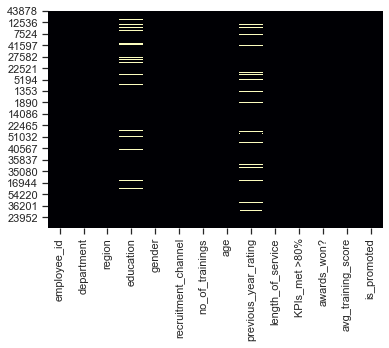

In [22]:
sns.set(style='ticks', font_scale=1)
sns.heatmap(df.isnull(), cbar=False, cmap='magma')

   Since only a very small percentage of data is missing, it is safe to replace the numeric data with mean and categorical data with mode as it will not affect the model in great detail
   
   In this dataset `education` variable is categorical and `previous_year_rating` is numeric

We will visualize these variables using bar graphs and histograms to understand the count and spread of both data types

Visual Representation: Education (*Categorical*)

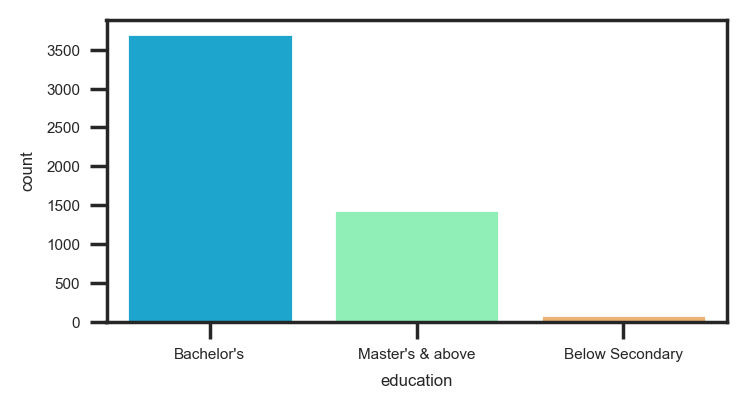

In [23]:
plt.figure(figsize=(4,2), dpi=200)
sns.set(style='ticks', font_scale=0.5)
sns.countplot(x='education', data=df, palette='rainbow');

Visual Representation: Previous Year Rating (*Numeric*)

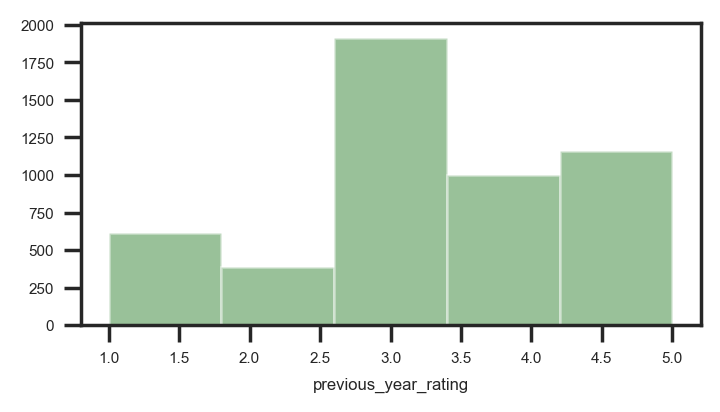

In [24]:
plt.figure(figsize=(4,2), dpi=200)
sns.set(style='ticks', font_scale=0.5)
sns.distplot(df.previous_year_rating, kde=False, color='darkgreen', bins=5);

   From the above visualizations we can clearly see that the most frequent value under `education` variable is `Bachelor's` and the `mean` value is around `3.0` under `previous_year_rating` variable
   
   Hence, we will replace them appropriate values respectively

In [25]:
df.education.mode()

0    Bachelor's
dtype: object

In [26]:
df.education = df.education.fillna('Bachelor\'s')

In [27]:
rating = round(df.previous_year_rating.mean(), 0)
rating

3.0

In [28]:
df.previous_year_rating = df.previous_year_rating.fillna(rating)

    Now rechecking for missing values using heatmap

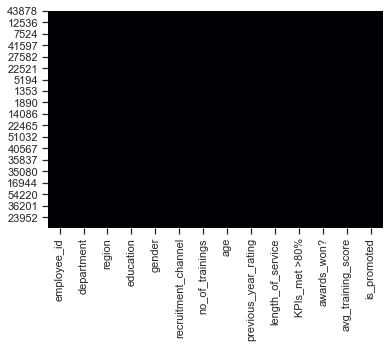

In [29]:
sns.set(style='ticks', font_scale=1)
sns.heatmap(df.isnull(), cbar=False, cmap='magma');

    All missing data has been successfully replaced with appropriate values

## 3. Visual Exploratory Data Analysis - EDA

We will convert all `object`(string) data types to `category` data types to reduce the memory usage

In [30]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5481 entries, 43878 to 15379
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   employee_id           5481 non-null   int64  
 1   department            5481 non-null   object 
 2   region                5481 non-null   object 
 3   education             5481 non-null   object 
 4   gender                5481 non-null   object 
 5   recruitment_channel   5481 non-null   object 
 6   no_of_trainings       5481 non-null   int64  
 7   age                   5481 non-null   int64  
 8   previous_year_rating  5481 non-null   float64
 9   length_of_service     5481 non-null   int64  
 10  KPIs_met >80%         5481 non-null   int64  
 11  awards_won?           5481 non-null   int64  
 12  avg_training_score    5481 non-null   int64  
 13  is_promoted           5481 non-null   int64  
dtypes: float64(1), int64(8), object(5)
memory usage: 663.3+ KB


In [31]:
df.department = df.department.astype('category')
df.region = df.region.astype('category')
df.education = df.education.astype('category')
df.gender = df.gender.astype('category')
df.recruitment_channel = df.recruitment_channel.astype('category')

In [32]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5481 entries, 43878 to 15379
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype   
---  ------                --------------  -----   
 0   employee_id           5481 non-null   int64   
 1   department            5481 non-null   category
 2   region                5481 non-null   category
 3   education             5481 non-null   category
 4   gender                5481 non-null   category
 5   recruitment_channel   5481 non-null   category
 6   no_of_trainings       5481 non-null   int64   
 7   age                   5481 non-null   int64   
 8   previous_year_rating  5481 non-null   float64 
 9   length_of_service     5481 non-null   int64   
 10  KPIs_met >80%         5481 non-null   int64   
 11  awards_won?           5481 non-null   int64   
 12  avg_training_score    5481 non-null   int64   
 13  is_promoted           5481 non-null   int64   
dtypes: category(5), float64(1), int64(8)
memory usage: 

    The memory usage has been reduced to 583.6 KB from 663.3+ KB

**Employee Promotion Count**

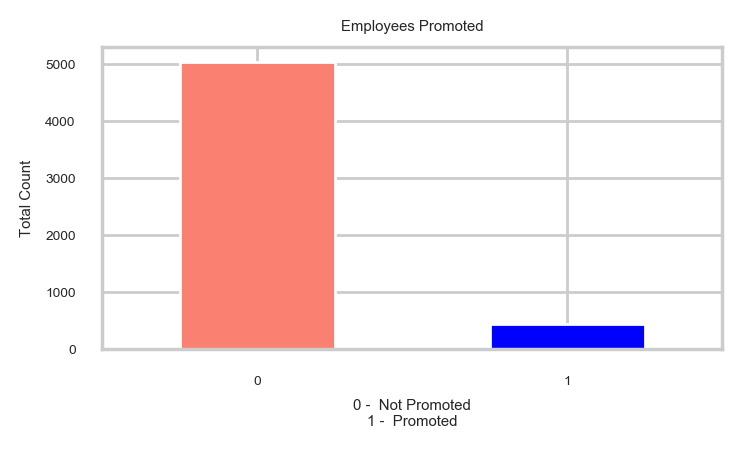

In [100]:
plt.figure(figsize=(4,2), dpi=200)
sns.set(style='whitegrid', font_scale=0.45)
df.is_promoted.value_counts().plot.bar(color=['salmon', 'blue'])
plt.xticks(rotation = 0)
plt.title('Employees Promoted')
plt.xlabel('0 -  Not Promoted\n1 -  Promoted')
plt.ylabel('Total Count');

**Gender vs Promotion**

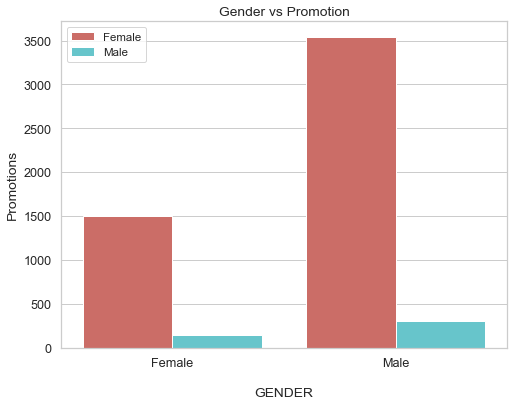

In [95]:
fig, ax = plt.subplots(figsize = (8,6))
ax = sns.countplot(x='gender', hue='is_promoted', data=df, palette='hls')
sns.set(style='whitegrid', font_scale=1.15)
ax.set(title = 'Gender vs Promotion',
       xlabel = '\nGENDER',
      ylabel = 'Promotions')

ax.legend(['Female', 'Male'], fontsize='small', loc='upper left');

**Department vs Promotion**

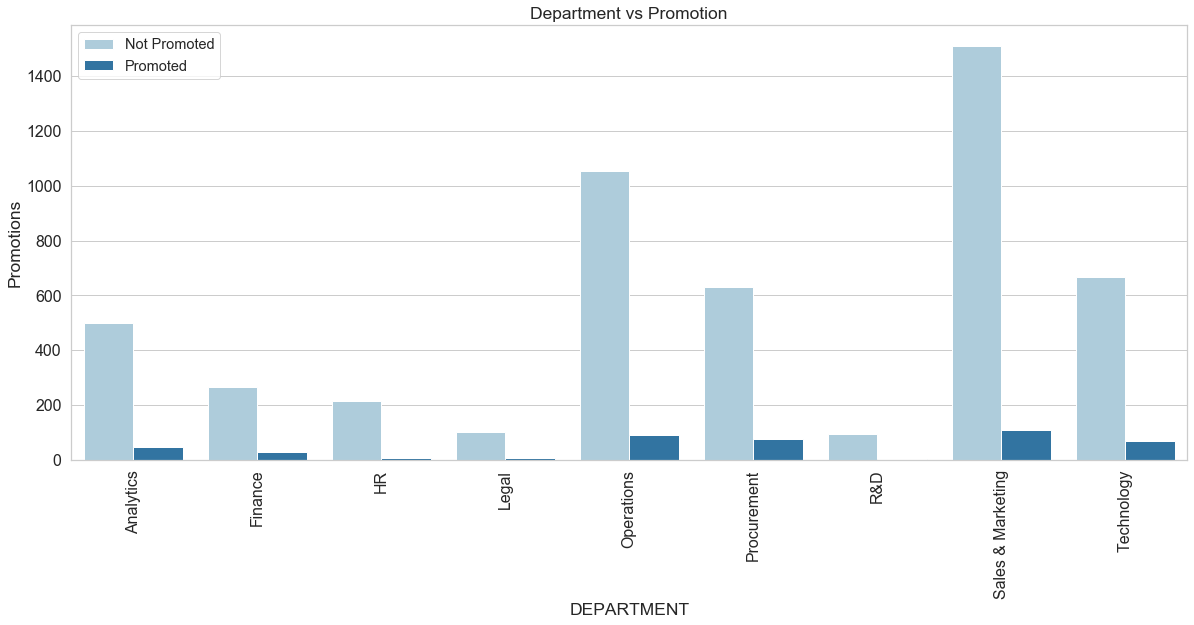

In [103]:
fig, ax = plt.subplots(figsize = (20,8))
ax = sns.countplot(x='department', hue='is_promoted', data=df, palette='Paired')
sns.set(style='whitegrid', font_scale=1.45)
ax.set(title = 'Department vs Promotion',
       xlabel = 'DEPARTMENT',
      ylabel = 'Promotions')

ax.legend(['Not Promoted', 'Promoted'], fontsize='small', loc='upper left')
plt.xticks(rotation=90);

**Education vs Promotion**

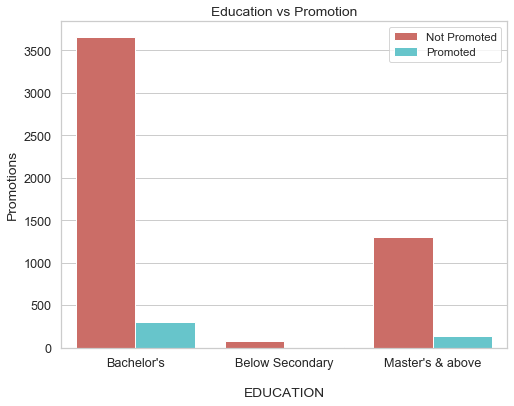

In [107]:
fig, ax = plt.subplots(figsize = (8,6))
ax = sns.countplot(x='education', hue='is_promoted', data=df, palette='hls')
sns.set(style='whitegrid', font_scale=1.15)
ax.set(title = 'Education vs Promotion',
       xlabel = '\nEDUCATION',
      ylabel = 'Promotions')

plt.legend(['Not Promoted', 'Promoted'], fontsize='small');

**Recruitment Channel vs Promotion**

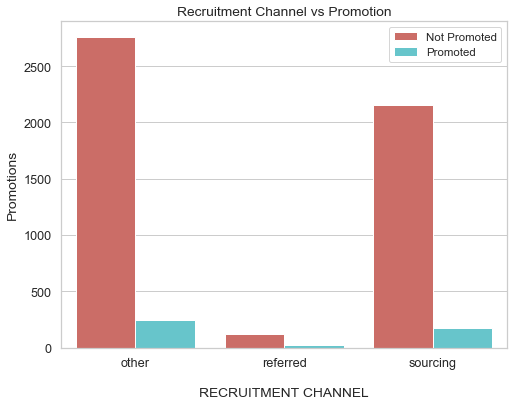

In [111]:
fig, ax = plt.subplots(figsize = (8,6))
ax = sns.countplot(x='recruitment_channel', hue='is_promoted', data=df, palette='hls')
sns.set(style='whitegrid', font_scale=1.15)
ax.set(title = 'Recruitment Channel vs Promotion',
       xlabel = '\nRECRUITMENT CHANNEL',
      ylabel = 'Promotions')

ax.legend(['Not Promoted', 'Promoted'], fontsize='small');

**Age Distribution**

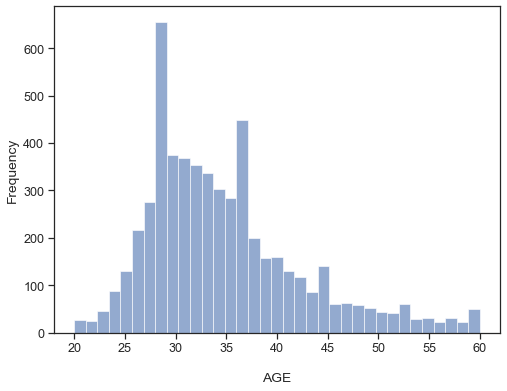

In [38]:
plt.figure(figsize=(8,6))
sns.set(style='ticks', font_scale=1.15)
df.age.plot.hist(bins=35, label='Age', alpha=0.6)
plt.xlabel('\nAGE');

   The variable `age` is slightly positively skewed which indicates possibility of outliers. We will deal with them in upcomming sections

**Length of Service Distribution**

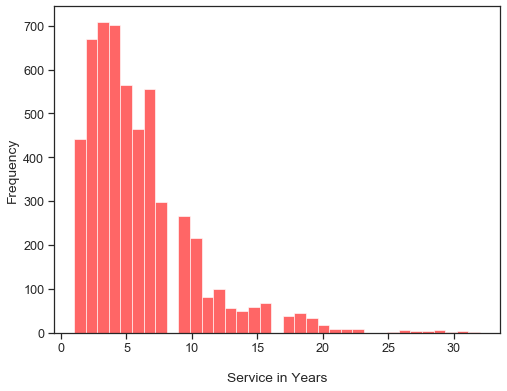

In [39]:
plt.figure(figsize=(8,6))
sns.set(style='ticks', font_scale=1.15)
df.length_of_service.plot.hist(bins=35, label='Service in Years', color='red', alpha=0.6)
plt.xlabel('\nService in Years');

   The variable `length_of_service` is also positively skewed which clearly indicates presence of outliers. We will deal with them in upcomming sections

**Average Training Score Distribution**

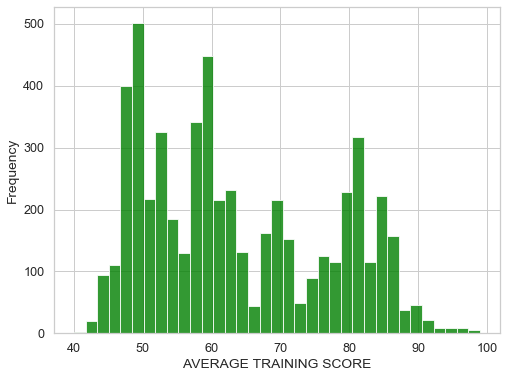

In [112]:
plt.figure(figsize=(8,6))
df['avg_training_score'].plot.hist(bins=35, color='green', alpha=0.8)
plt.xlabel('AVERAGE TRAINING SCORE');

**Trainings vs Promotion**

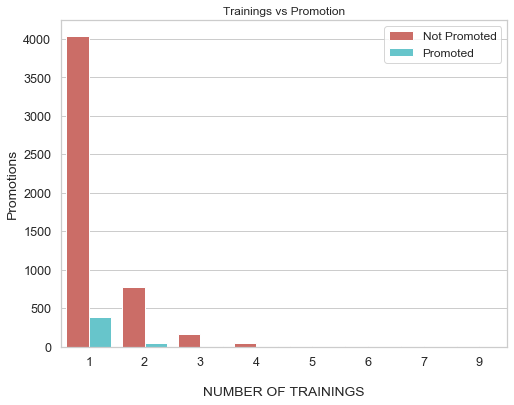

In [118]:
fig, ax = plt.subplots(figsize = (8,6))
ax = sns.countplot(x='no_of_trainings', hue='is_promoted', data=df, palette='hls')
sns.set(style='whitegrid', font_scale=1)
ax.set(title = 'Trainings vs Promotion',
       xlabel = '\nNUMBER OF TRAININGS',
      ylabel = 'Promotions')

ax.legend(['Not Promoted', 'Promoted'], fontsize='medium', loc='upper right');

**Ratings vs Promotion**

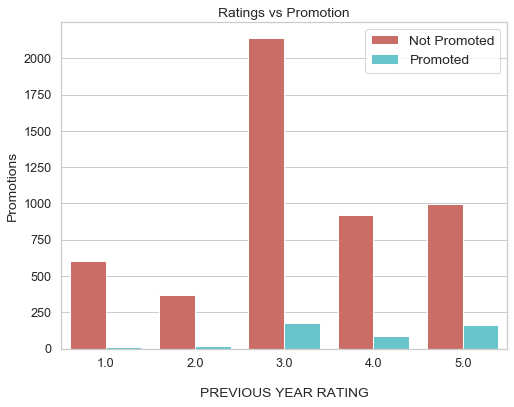

In [120]:
fig, ax = plt.subplots(figsize = (8,6))
ax = sns.countplot(x='previous_year_rating', hue='is_promoted', data=df, palette='hls')
sns.set(style='whitegrid', font_scale=1.15)
ax.set(title = 'Ratings vs Promotion',
       xlabel = '\nPREVIOUS YEAR RATING',
      ylabel = 'Promotions')

ax.legend(['Not Promoted', 'Promoted'], fontsize='medium');

**KPIs Met vs Promotion**

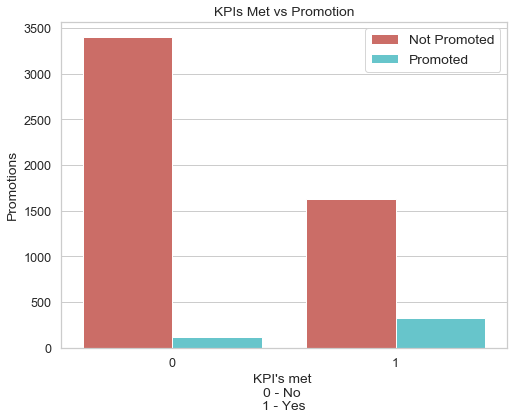

In [121]:
fig, ax = plt.subplots(figsize = (8,6))
ax = sns.countplot(x='KPIs_met >80%', hue='is_promoted', data=df, palette='hls')
sns.set(style='whitegrid', font_scale=1.15)
ax.set(title = 'KPIs Met vs Promotion', 
      ylabel = 'Promotions')
plt.xlabel('KPI\'s met \n0 - No \n1 - Yes')
ax.legend(['Not Promoted', 'Promoted'], fontsize='medium');

**Awards Won vs Promotion**

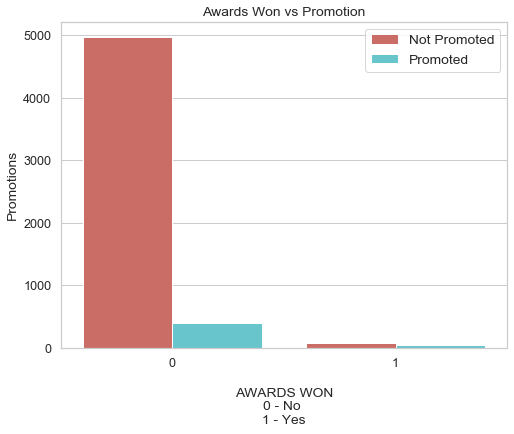

In [122]:
fig, ax = plt.subplots(figsize = (8,6))
ax = sns.countplot(x='awards_won?', hue='is_promoted', data=df, palette='hls')
sns.set(style='whitegrid', font_scale=1.15)
ax.set(title = 'Awards Won vs Promotion',
       xlabel = '\nAWARDS WON\n0 - No \n1 - Yes',
      ylabel = 'Promotions')

ax.legend(['Not Promoted', 'Promoted'], fontsize='medium');

**Departments vs Promotion**

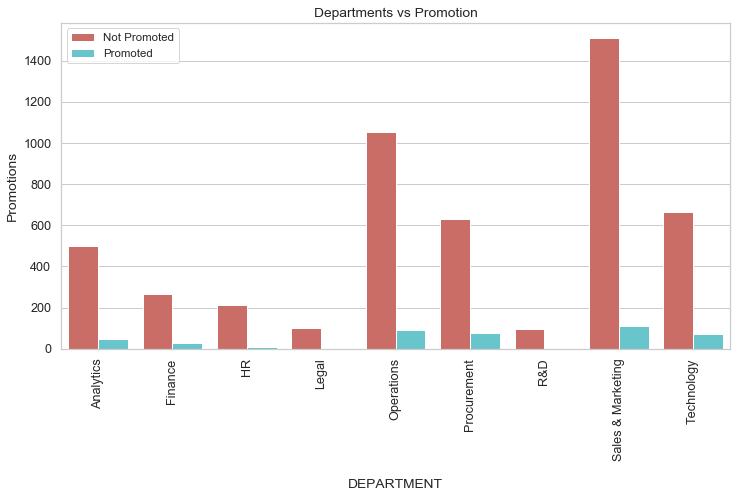

In [125]:
fig, ax = plt.subplots(figsize = (12,6))
sns.countplot('department', hue='is_promoted', data=df, palette='hls')
sns.set(style='whitegrid', font_scale=1.15)
ax.set(title = 'Departments vs Promotion',
       xlabel = '\nDEPARTMENT',
      ylabel = 'Promotions')
plt.xticks(rotation=90)
ax.legend(['Not Promoted', 'Promoted'], fontsize='small');

**Region vs Promotion**

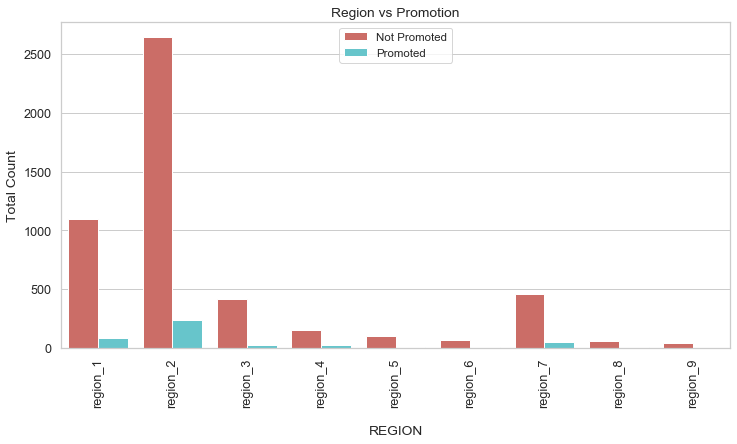

In [46]:
fig, ax = plt.subplots(figsize = (12,6))
sns.countplot('region', hue='is_promoted', data=df, palette='hls')
sns.set(style='whitegrid', font_scale=1.15)
ax.set(title = 'Region vs Promotion',
       xlabel = '\nREGION',
      ylabel = 'Promotions')
plt.xticks(rotation=90)
ax.legend(['Not Promoted', 'Promoted'], fontsize='small');

In [47]:
from matplotlib import pyplot
from matplotlib import pylab

**Scatter Plot - Lenght of Service vs Age**

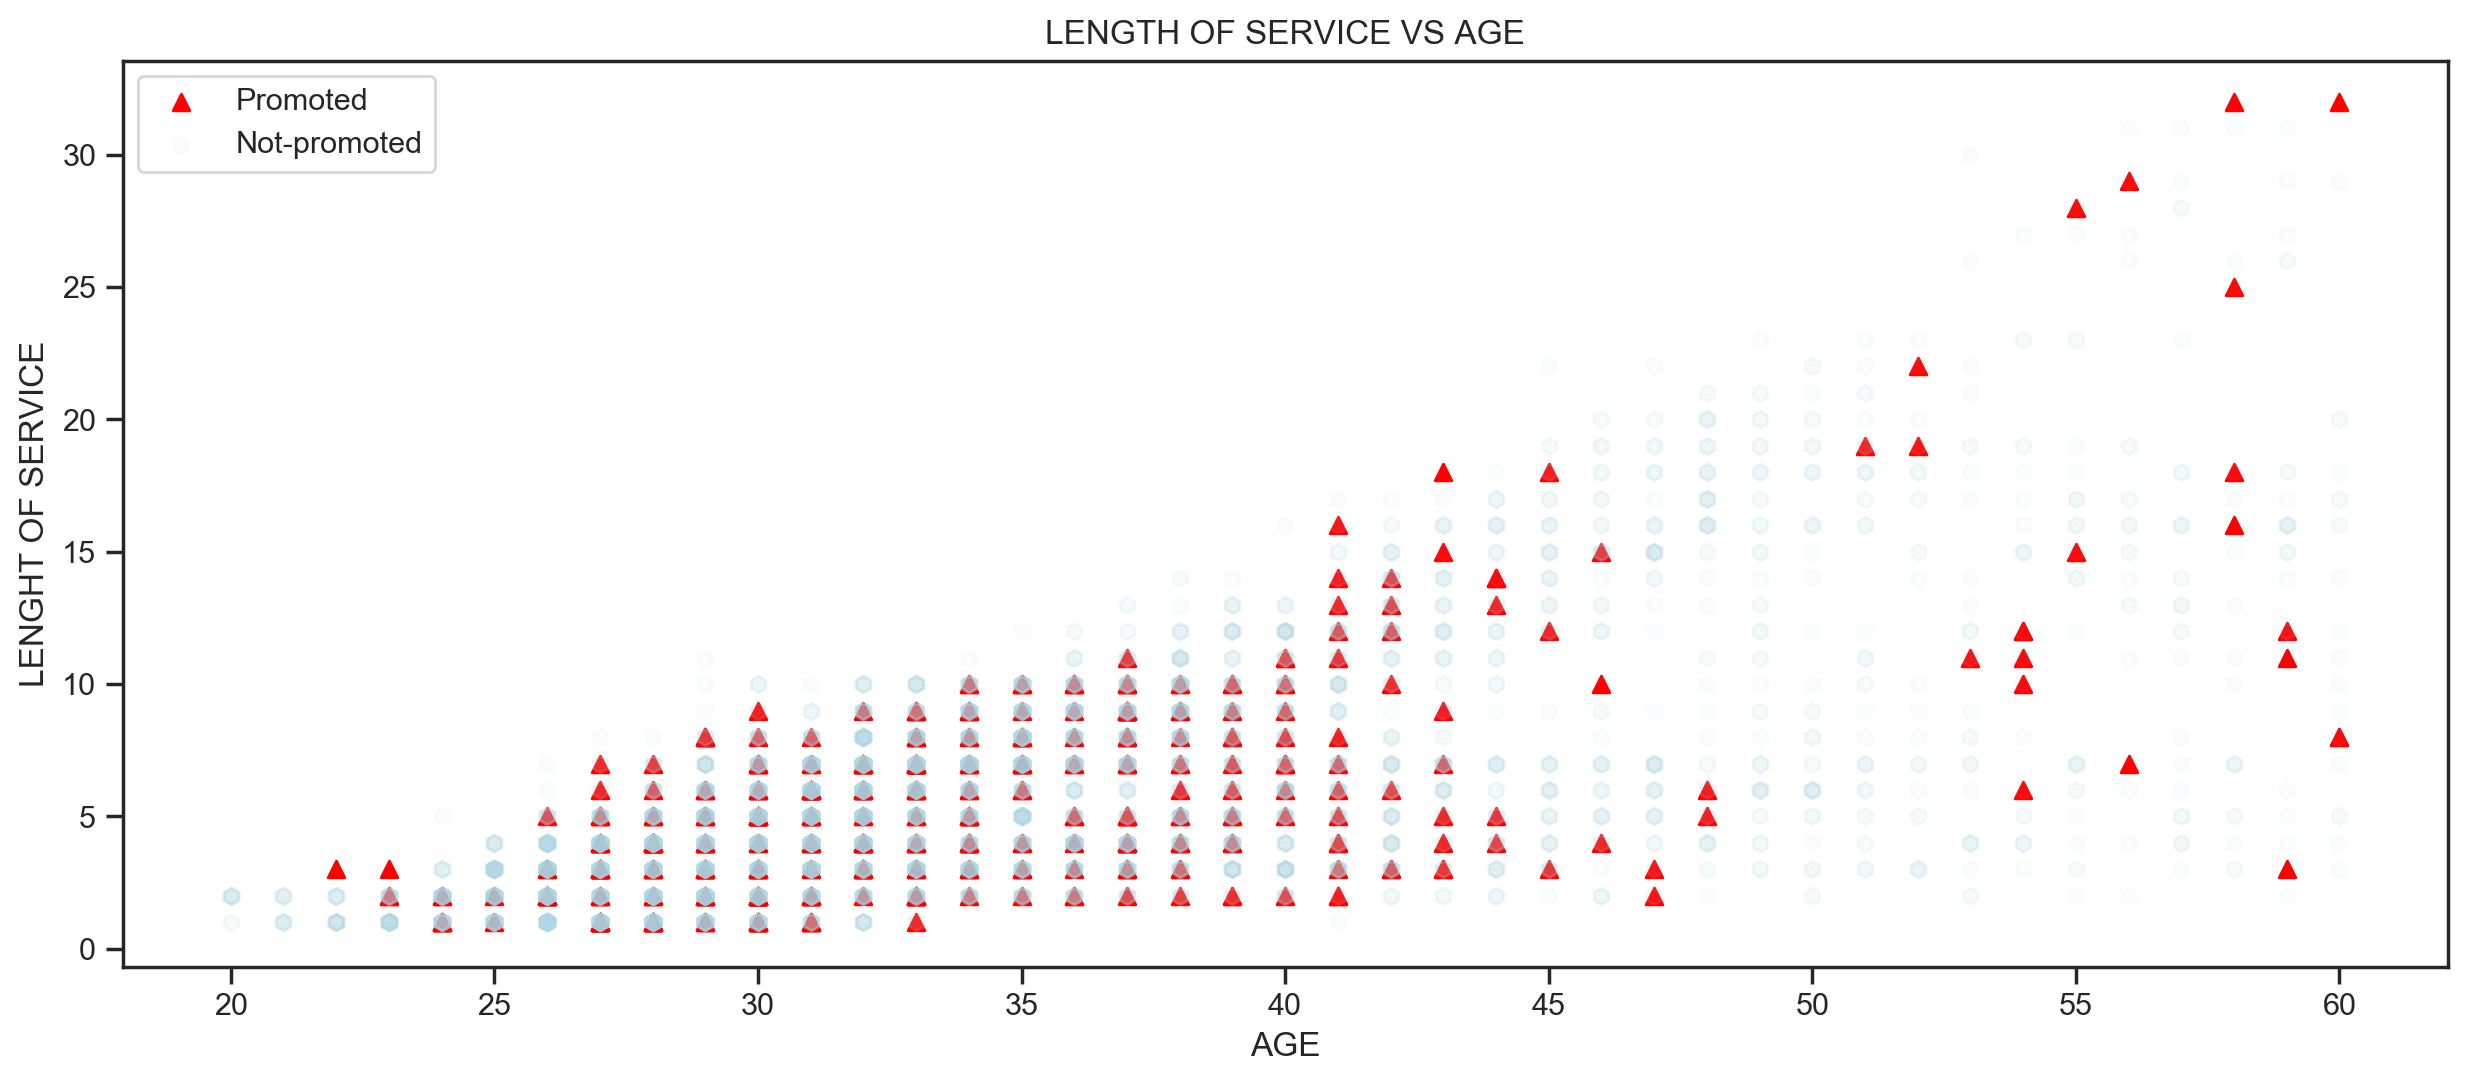

In [84]:
plt.figure(figsize=(15,6), dpi=200)
sns.set(style='ticks', font_scale=1)

# Employees who got promotion
plt.scatter(df.age[df.is_promoted == 1], df.length_of_service[df.is_promoted == 1],
           c='red', marker='^')

# Employees who didn't get promotion
plt.scatter(df.age[df.is_promoted == 0], df.length_of_service[df.is_promoted == 0],
            c='lightblue', alpha=0.05, marker='h')

plt.legend(['Promoted', 'Not-promoted'])
plt.xlabel('AGE')
plt.ylabel('LENGHT OF SERVICE')
plt.title('LENGTH OF SERVICE VS AGE');

**Scatter Plot - Average Training Score vs Age**

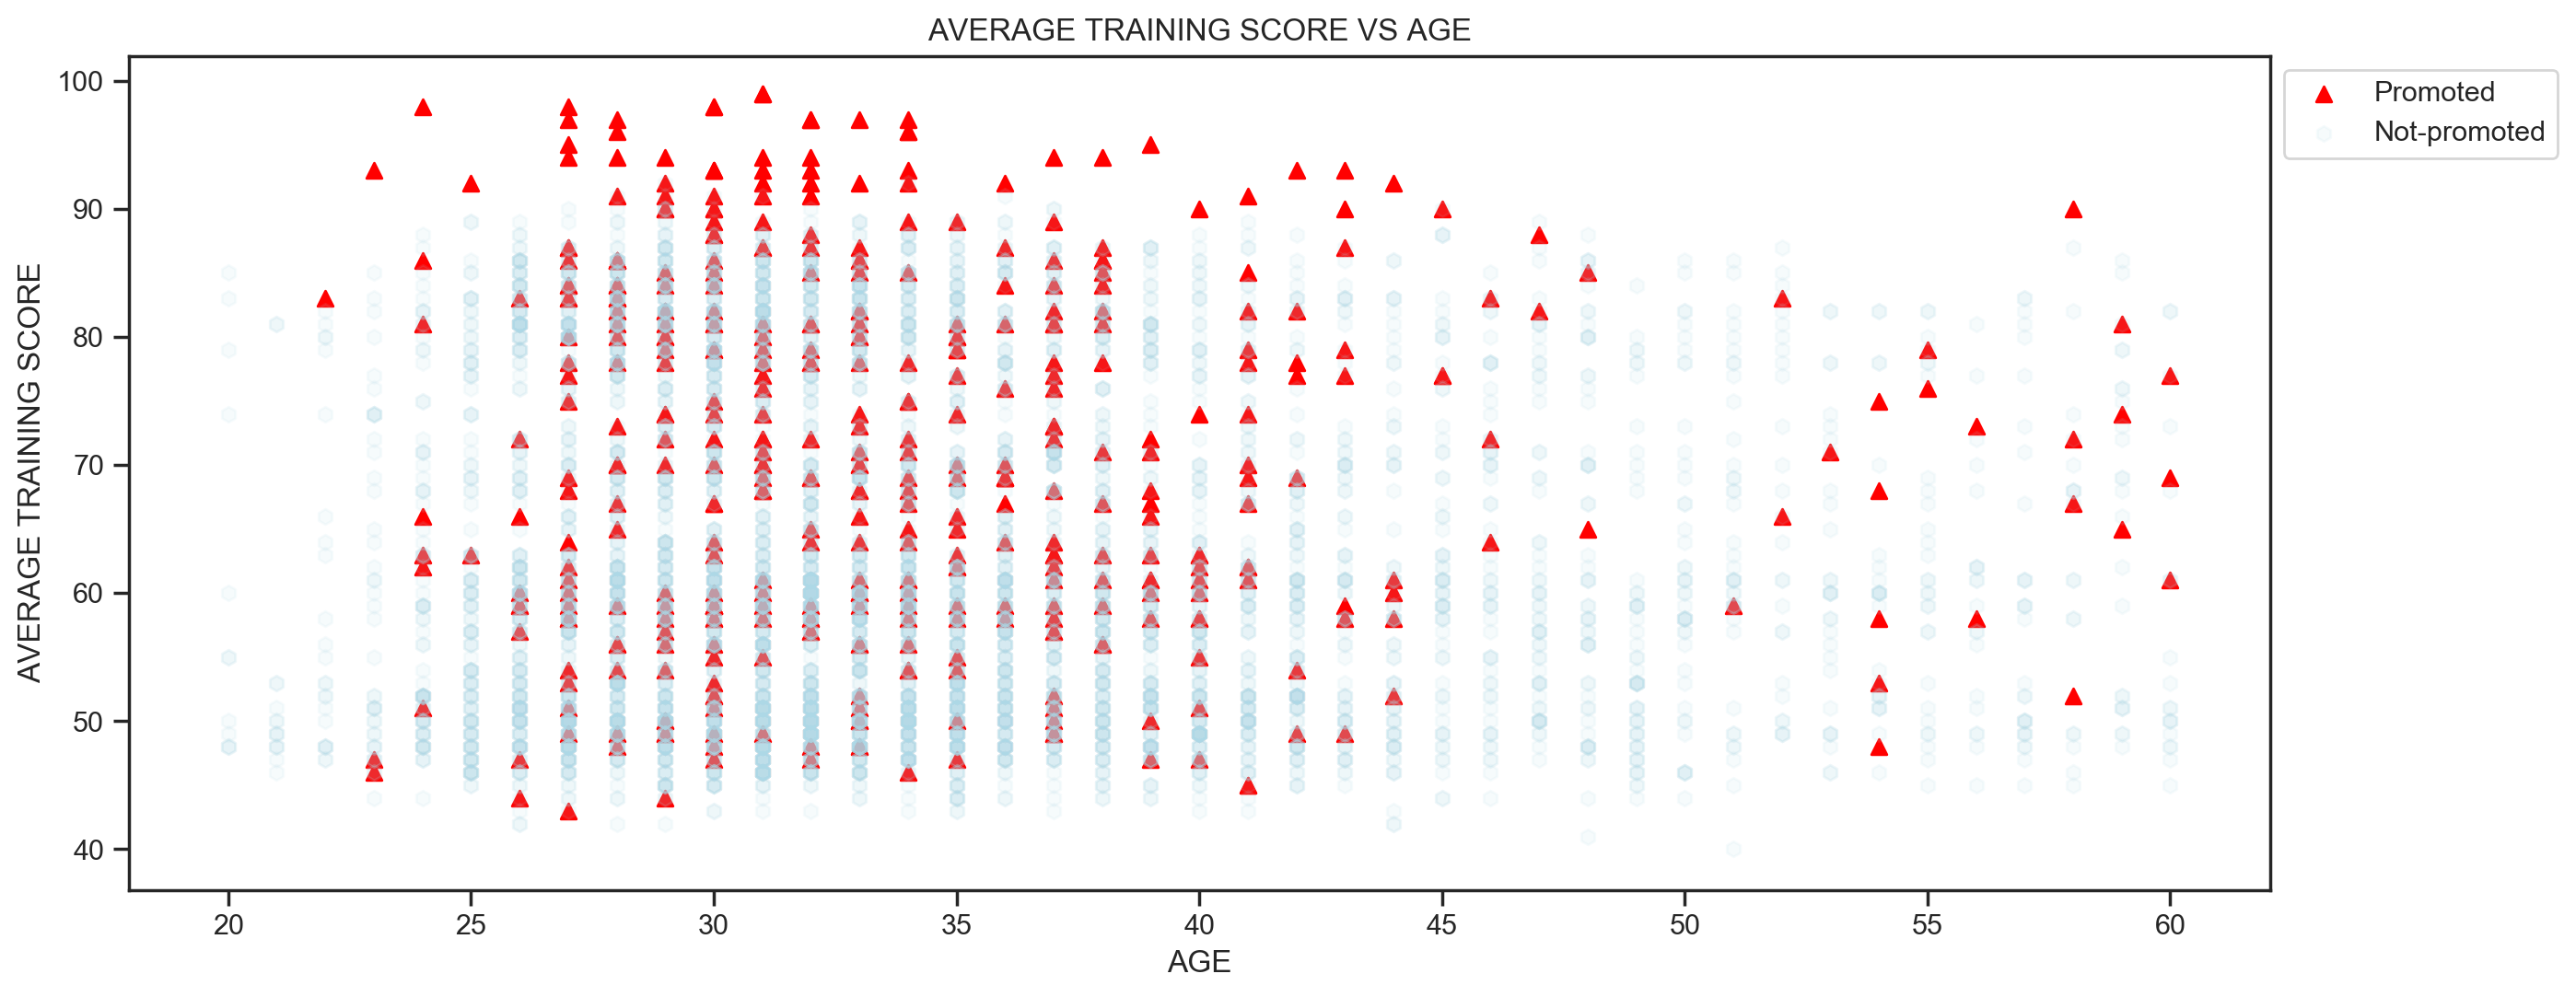

In [85]:
plt.figure(figsize=(15,6), dpi=200)
sns.set(style='ticks', font_scale=1)

# Employees who got promotion
plt.scatter(df.age[df.is_promoted == 1], df.avg_training_score[df.is_promoted == 1],marker='^',
           c='red')

# Employees who didn't get promotion
plt.scatter(df.age[df.is_promoted == 0], df.avg_training_score[df.is_promoted == 0],marker='h', 
            alpha=0.1, c='lightblue')

plt.legend(['Promoted', 'Not-promoted'], bbox_to_anchor=(1,1), loc='upper left')
plt.xlabel('AGE')
plt.ylabel('AVERAGE TRAINING SCORE')
plt.title('AVERAGE TRAINING SCORE VS AGE');

**Scatter Plot - Average Training Score vs Length of Service**

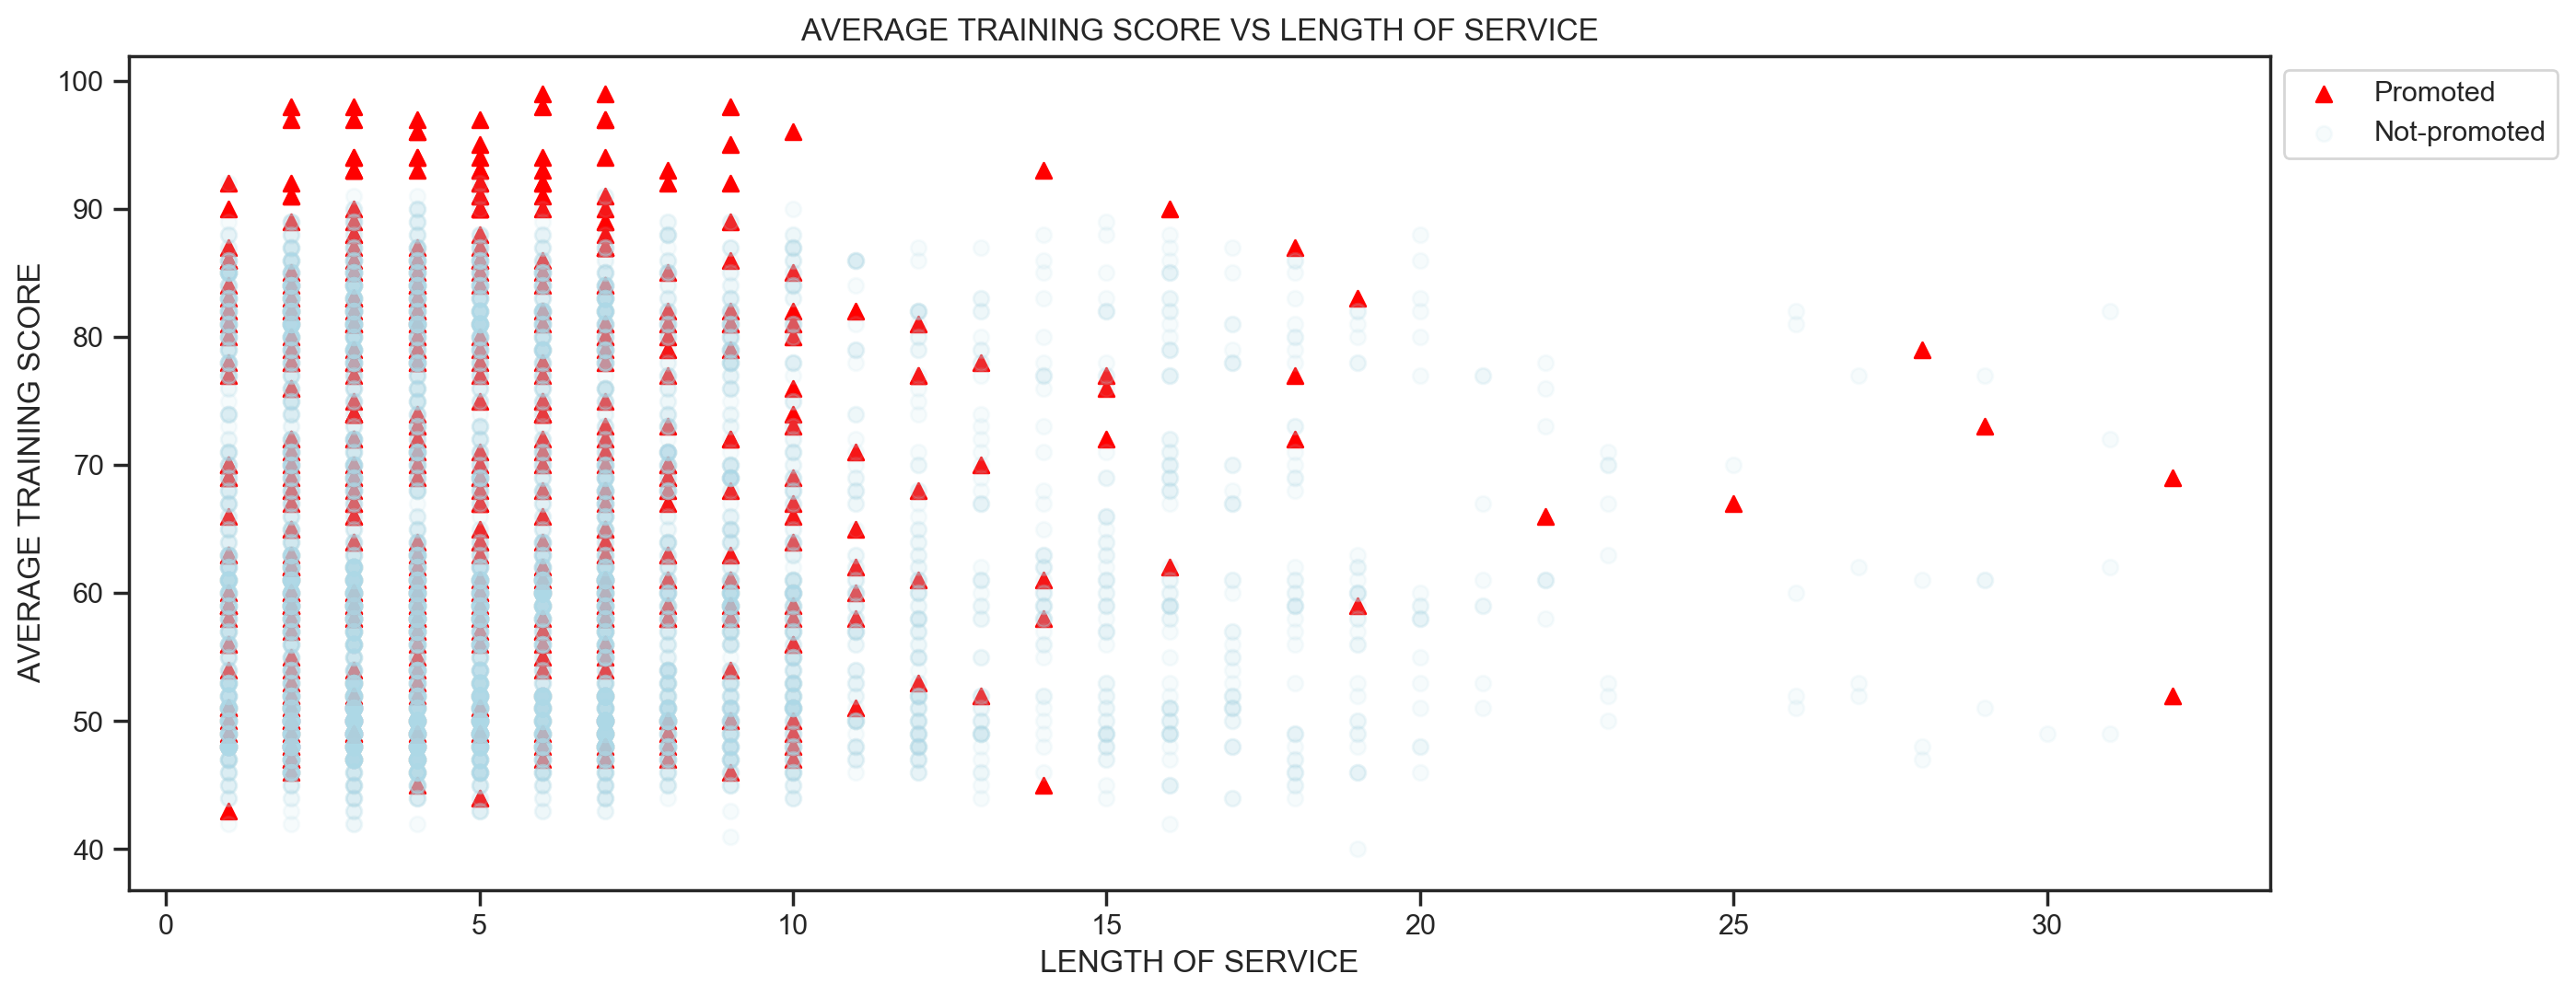

In [127]:
plt.figure(figsize=(15,6), dpi=200)
sns.set(style='ticks', font_scale=1)

# Employees who got promotion
plt.scatter(df.length_of_service[df.is_promoted == 1], df.avg_training_score[df.is_promoted == 1], 
            c='red', marker='^')

# Employees who didn't get promotion
plt.scatter(df.length_of_service[df.is_promoted == 0], df.avg_training_score[df.is_promoted == 0],
            c='lightblue', alpha=0.1)

plt.legend(['Promoted', 'Not-promoted'], bbox_to_anchor=(1,1), loc='upper left')
plt.xlabel('LENGTH OF SERVICE')
plt.ylabel('AVERAGE TRAINING SCORE')
plt.title('AVERAGE TRAINING SCORE VS LENGTH OF SERVICE');

In [128]:
df.corr()

,employee_id,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted
employee_id,1.000000,-0.000465,-0.008535,-0.011408,-0.005134,0.004738,-0.000991,0.010700,0.009422
no_of_trainings,-0.000465,1.000000,-0.067144,-0.065845,-0.043056,-0.054975,0.005102,0.056634,-0.034745
age,-0.008535,-0.067144,1.000000,0.034717,0.664672,-0.029565,-0.003245,-0.050896,-0.013395
previous_year_rating,-0.011408,-0.065845,0.034717,1.000000,0.035174,0.334932,0.020642,0.062002,0.131750
length_of_service,-0.005134,-0.043056,0.664672,0.035174,1.000000,-0.081063,-0.043813,-0.040492,-0.016193
KPIs_met >80%,0.004738,-0.054975,-0.029565,0.334932,-0.081063,1.000000,0.082134,0.072767,0.233306
awards_won?,-0.000991,0.005102,-0.003245,0.020642,-0.043813,0.082134,1.000000,0.065227,0.166829
avg_training_score,0.010700,0.056634,-0.050896,0.062002,-0.040492,0.072767,0.065227,1.000000,0.168713
is_promoted,0.009422,-0.034745,-0.013395,0.131750,-0.016193,0.233306,0.166829,0.168713,1.000000


**Correlation Heatmap**

<Figure size 432x288 with 0 Axes>

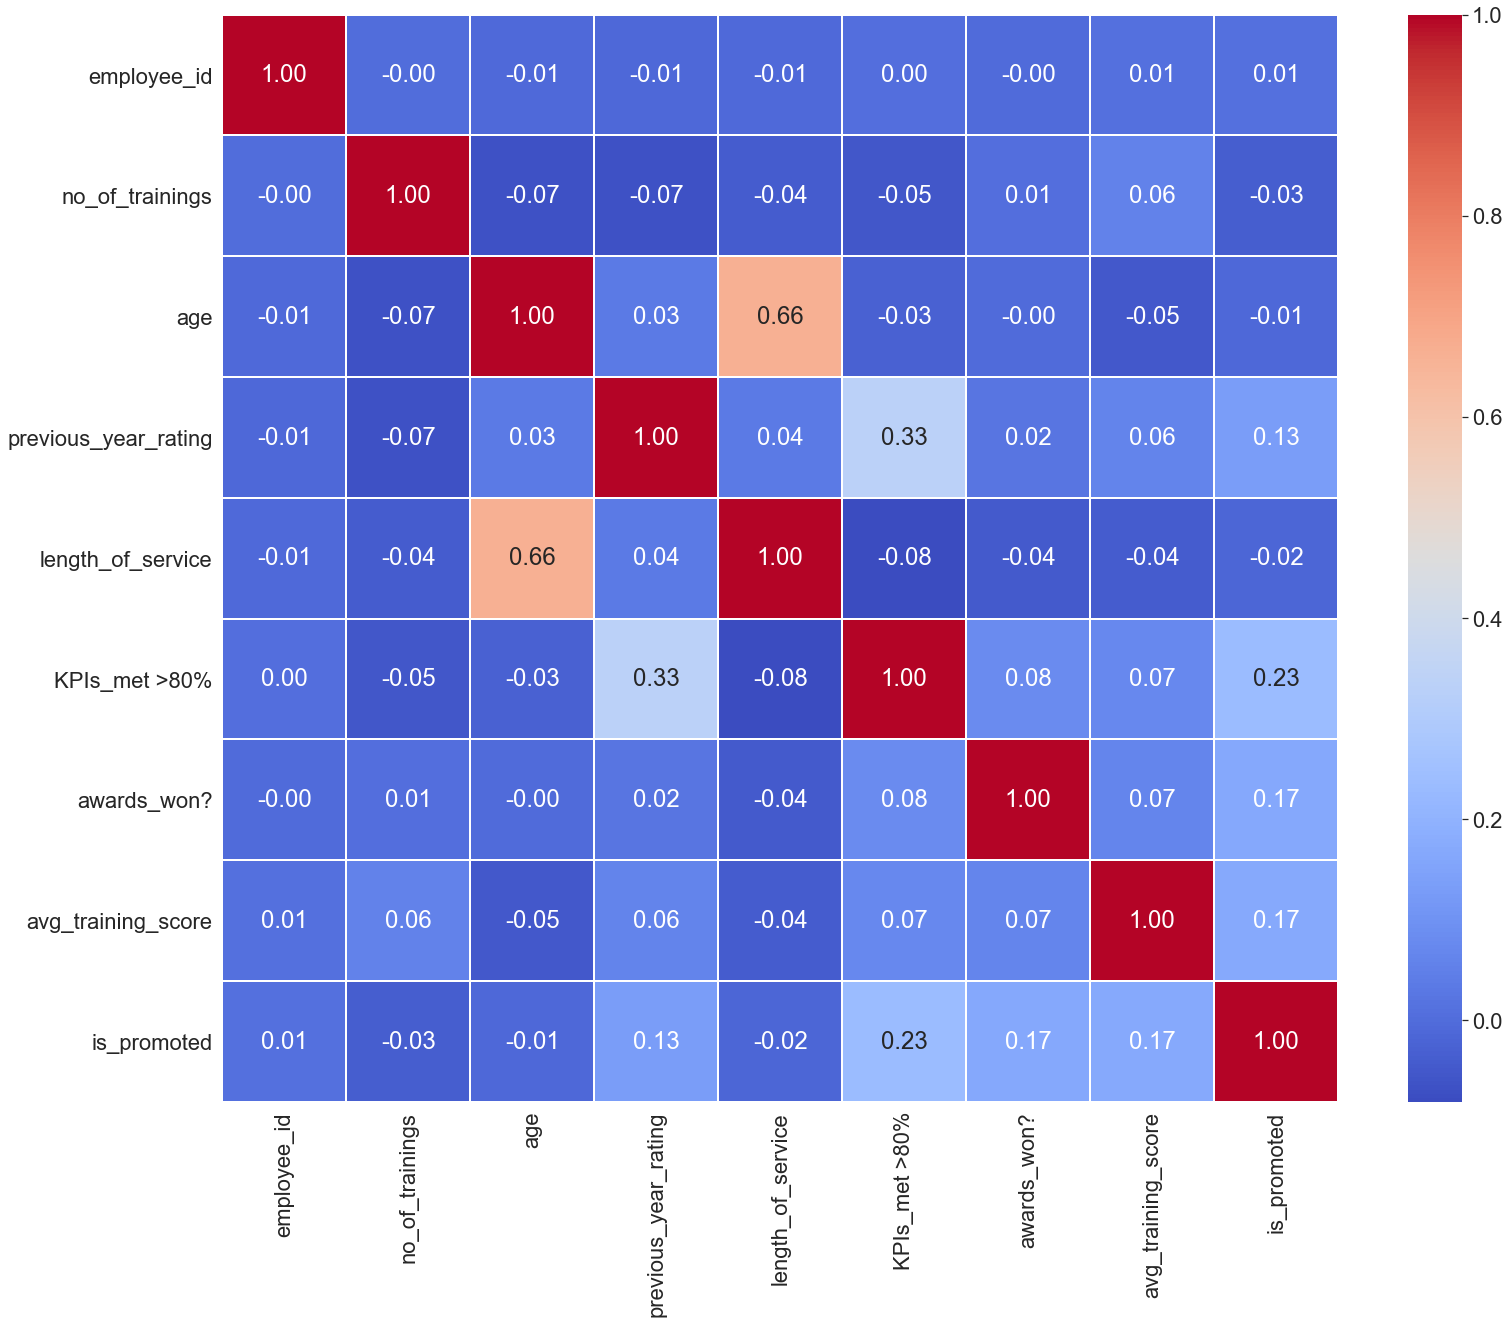

In [130]:
### Seaborn Heatmap
plt.figure()
fig, ax = plt.subplots(figsize=(25,20))
sns.set(font_scale=2)
ax = sns.heatmap(df.corr(),
                annot=True,
                linewidths=1,
                fmt='.2f',
                cmap='coolwarm');